# Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification  

#*He et al., 2015*

# https://arxiv.org/abs/1502.01852

---

## 📑 Academic Summary

**Title:** *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*  
**Authors:** Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun (Microsoft Research)

---

## 🔹 Motivation
The paper investigates two central challenges in deep convolutional neural networks (CNNs):

1. **Rigid activation functions (ReLU):** Standard ReLU may limit representational power due to its fixed nonlinearity.  
2. **Poor convergence in very deep rectifier networks:** Traditional initialization (e.g., Xavier) fails to stabilize signals, hindering training of ultra-deep CNNs.

---

## 🔹 Contributions

### **1. Parametric ReLU (PReLU)**
A generalization of ReLU where the slope for negative activations is **learnable per channel**.

$$
f(y_i) =
\begin{cases}
y_i, & y_i > 0 \\
a_i y_i, & y_i \leq 0
\end{cases}
$$

- \(a_i\): learnable parameter controlling negative slope.  
- Adds negligible parameter overhead.  
- Empirically reduced ImageNet top-1 error by **~1%** over standard ReLU.

---

### **2. He Initialization (Variance Scaling for Rectifiers)**
A principled weight initialization method accounting for rectifier nonlinearities.  

Standard deviation of initialization:

$$
\sigma = \sqrt{\frac{2}{n}}
$$

Where \( n \) = number of input connections (*fan-in*).  

- Preserves variance of signals forward and backward.  
- Stabilized training of CNNs with **30+ layers** from scratch.  
- Outperformed Xavier initialization for ReLU/PReLU networks.

---

### **3. Architectural Design**
- Explored deeper and wider CNNs with **Spatial Pyramid Pooling (SPP)**.  
- Found that **increasing width** gave better gains than simply adding depth beyond ~22 layers.  

---

## 🔹 Results

**ImageNet 2012 Classification:**
- **Single-model PReLU-net:** **5.71% top-5 error.**  
- **Multi-model ensemble:** **4.94% top-5 error.**  
  - Outperformed GoogLeNet (**6.66%**) and **human-level performance (~5.1%)**.  

**Significance:**  
- First published work to **surpass human-level accuracy on ImageNet**.  
- Demonstrated synergy between **learnable activations** and **principled initialization**.  

---

## 🔹 Impact

- **He Initialization** became the *de facto* standard for deep rectifier networks.  
- **PReLU** inspired later nonlinearities: RReLU, SELU, Swish, Mish.  
- Provided theoretical and empirical basis for training deeper CNNs.  
- Set the stage for **ResNet (2015)**, which revolutionized deep architectures through residual learning.  

---

## ✅ Summary
He et al. (2015) introduced **PReLU** and **He Initialization**, proving that adaptive activations + principled variance scaling enable deeper, more powerful CNNs. Their model was the **first to surpass human-level performance** on ImageNet, marking a pivotal moment in deep learning history and paving the way for **ResNet’s breakthrough**.


# 📐 Mathematical Equations (He et al., 2015)

---

## 1. Parametric ReLU (PReLU) Definition

$$
f(y_i) =
\begin{cases}
y_i, & y_i > 0 \\
a_i y_i, & y_i \leq 0
\end{cases}
$$

**Special cases:**
- \(a_i = 0 \;\;\Rightarrow\;\; \text{ReLU}\)  
- \(a_i = 0.01 \;\;\Rightarrow\;\; \text{Leaky ReLU (fixed)}\)  
- Learnable \(a_i \;\;\Rightarrow\;\; \text{PReLU}\)  

**Alternative form:**

$$
f(y_i) = \max(0, y_i) + a_i \min(0, y_i)
$$

---

## 2. Gradient of Loss wrt Parameter \(a_i\)

$$
\frac{\partial E}{\partial a_i}
= \sum_{y_i}
\frac{\partial E}{\partial f(y_i)} \cdot
\frac{\partial f(y_i)}{\partial a_i}
$$

With:

$$
\frac{\partial f(y_i)}{\partial a_i} =
\begin{cases}
0, & y_i > 0 \\
y_i, & y_i \leq 0
\end{cases}
$$

**Update rule (with momentum):**

$$
\Delta a_i := \mu \Delta a_i + \varepsilon \frac{\partial E}{\partial a_i}
$$

---

## 3. Forward Propagation Variance (Rectifier Case)

Layer output:

$$
y_l = W_l x_l + b_l
$$

Variance propagation:

$$
\text{Var}[y_l] = n_l \,\text{Var}[w_l] \, \mathbb{E}[x_l^2]
$$

For ReLU/PReLU (using symmetry):

$$
\mathbb{E}[x_l^2] = \tfrac{1}{2}\,\text{Var}[y_{l-1}]
$$

Thus:

$$
\text{Var}[y_l] = \tfrac{1}{2} n_l \,\text{Var}[w_l] \,\text{Var}[y_{l-1}]
$$

Recursive across layers:

$$
\text{Var}[y_L] = \text{Var}[y_1]
\prod_{l=2}^L \tfrac{1}{2} n_l \,\text{Var}[w_l]
$$

---

## 4. Initialization Condition (Forward Stability)

To preserve variance:

$$
\tfrac{1}{2} n_l \,\text{Var}[w_l] = 1 \quad \forall l
$$

This yields:

$$
\text{Var}[w_l] = \frac{2}{n_l},
\quad w_l \sim N\left(0, \frac{2}{n_l}\right)
$$

(Standard deviation: \( \sigma = \sqrt{2/n_l} \))

---

## 5. Backward Propagation Variance

Gradient update:

$$
\Delta x_l = W_l^T \Delta y_l
$$

Variance:

$$
\text{Var}[\Delta x_l] =
\tfrac{1}{2} \hat{n}_l \,\text{Var}[w_l] \,\text{Var}[\Delta x_{l+1}]
$$

Stability condition:

$$
\tfrac{1}{2} \hat{n}_l \,\text{Var}[w_l] = 1 \quad \forall l
$$

---

## 6. PReLU Initialization Generalization

With coefficient \(a\) (fixed initialization):

$$
\tfrac{1}{2}(1 + a^2) n_l \,\text{Var}[w_l] = 1
$$

or equivalently:

$$
\text{Var}[w_l] = \frac{2}{(1+a^2) n_l}
$$

---

## 7. Xavier vs He (Contrast)

- **Xavier (Glorot, 2010):**

$$
\text{Var}[w_l] = \frac{1}{n_l}
\quad \text{(linear activations assumption)}
$$

- **He (2015):**

$$
\text{Var}[w_l] = \frac{2}{n_l}
\quad \text{(rectifier-aware)}
$$

---

## ✅ Summary of Math

- **Eqn. (1):** PReLU activation definition.  
- **Eqn. (2–4):** Gradient wrt \(a_i\) + momentum update.  
- **Eqn. (5–9):** Forward variance propagation.  
- **Eqn. (10–14):** Initialization stability conditions.  
- **Eqn. (15):** PReLU initialization generalization.  
- **Eqn. (16–17):** Xavier vs He → rectifier-aware scaling.  


# Delving Deep into Rectifiers (He et al., 2015)
```
+------------------+         +----------------------+         +---------------------+
|   Input Images   |  --->   |   Deep CNN (30+ L)   |  --->   |  Class Probabilities |
|   (ImageNet)     |         |  Conv + PReLU + SPP  |         |   (Softmax Output)   |
+------------------+         +----------------------+         +---------------------+

---------------------------------------------------------------
Core Innovations
---------------------------------------------------------------

[1] Parametric ReLU (PReLU)
    f(y) = y, if y > 0
           a*y, if y ≤ 0
    - Learnable slope (a)
    - Generalizes ReLU / Leaky ReLU
    - Negligible parameter overhead

[2] He Initialization
    Var[w] = 2 / n
    - Derived from variance-preserving analysis
    - Accounts for half activations being zeroed by ReLU
    - Ensures stable forward/backward signal flow

---------------------------------------------------------------
Training Dynamics
---------------------------------------------------------------

  Xavier Init (Glorot, 2010)        He Init (2015)
  ----------------------------      ----------------------------
  • Works for Tanh/Sigmoid          • Tailored for ReLU/PReLU
  • Deep nets (>20 layers) fail     • Enables 30+ layers stable training
  • Variance mismatch               • Variance-preserving

---------------------------------------------------------------
Results (ImageNet 2012)
---------------------------------------------------------------
- PReLU-Net (single model): 5.71% top-5 error
- Ensemble: 4.94% top-5 error
- Surpassed GoogLeNet (6.66%)
- Surpassed Human-level (5.1%)

---------------------------------------------------------------
Impact
---------------------------------------------------------------
✓ Opened door for training deeper CNNs
✓ Introduced widely used "He initialization"
✓ Inspired advanced activations (RReLU, SELU, Swish, Mish)
✓ Foundation for ResNet (2015)
```

# Evolution of Deep Net Training (2010 → 2015)
```
+----------------------------------------------------+----------------------------------------------------+
|        Glorot & Bengio (2010)                      |          He et al. (2015)                          |
|  "Understanding the Difficulty of Training Deep    |  "Delving Deep into Rectifiers: Surpassing         |
|   Feedforward Neural Networks"                     |   Human-Level Performance on ImageNet"             |
+----------------------------------------------------+----------------------------------------------------+

Problem Context:                                   | Problem Context:
-------------------------------------------------- | ---------------------------------------------------
- Deep MLPs (sigmoid/tanh) fail to train well.     | - ReLU improves optimization but discards negatives.
- Gradient vanishing/exploding.                    | - Xavier init not suited for rectifiers.
- Saturation in top layers blocks learning.        | - Deep ReLU nets (>20L) hard to converge.

-------------------------------------------------- | ---------------------------------------------------

Key Contributions:                                | Key Contributions:
-------------------------------------------------- | ---------------------------------------------------
[1] Variance-preserving analysis.                  | [1] Parametric ReLU (PReLU).
[2] Normalized (Xavier) init:                      |       f(y) = y (y>0), a*y (y<=0), learnable slope.
    Var[w] = 2 / (n_in + n_out).                   | [2] He Initialization:
[3] Identified role of activations:                |       Var[w] = 2 / n_in.
    - Sigmoid = unusable.                          | [3] Stable training of 30+ layer CNNs.
    - Tanh = partial.                              | [4] Architectural scaling (depth+width).
    - Softsign = robust.                           |

-------------------------------------------------- | ---------------------------------------------------

Training Dynamics:                                | Training Dynamics:
-------------------------------------------------- | ---------------------------------------------------
- Sigmoid nets collapse (accuracy ~chance).        | - ReLU/PReLU nets train deeper, faster.
- Tanh nets learn but plateau.                     | - He init keeps variance stable across depth.
- Softsign + Xavier works best (~50%).             | - 30+ layer nets converge reliably.

-------------------------------------------------- | ---------------------------------------------------

Results:                                          | Results:
-------------------------------------------------- | ---------------------------------------------------
- Showed why deep nets fail with poor init.        | - PReLU nets: 5.71% top-5 error (single model).
- Demonstrated Xavier init enables training.       | - Ensemble: 4.94% (better than GoogLeNet 6.66%).
- Benchmarked on MNIST, CIFAR-10, ImageNet small.  | - First to surpass human-level (5.1%) on ImageNet.

-------------------------------------------------- | ---------------------------------------------------

Impact:                                           | Impact:
-------------------------------------------------- | ---------------------------------------------------
✓ Shifted focus to initialization & activations.   | ✓ Standardized "He init" in modern DL frameworks.
✓ Foundation for unsupervised pretraining trend.   | ✓ Inspired new activations (SELU, Swish, Mish).
✓ Highlighted saturation/gradient issues.          | ✓ Provided base for ResNet (2015) revolution.
```

In [1]:
# Replication of He et al. (2015) - Delving Deep into Rectifiers
# ---------------------------------------------------------------
# Compare ReLU vs PReLU on CIFAR-10 using He initialization

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -------------------------
# 1. Data (CIFAR-10)
# -------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False)

# -------------------------
# 2. CNN Model
# -------------------------
class SimpleCNN(nn.Module):
    def __init__(self, activation="relu"):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256*4*4, 512)
        self.fc2 = nn.Linear(512, 10)

        # Choose activation
        if activation == "prelu":
            self.act1 = nn.PReLU()
            self.act2 = nn.PReLU()
            self.act3 = nn.PReLU()
            self.act_fc = nn.PReLU()
        else:
            self.act1 = nn.ReLU()
            self.act2 = nn.ReLU()
            self.act3 = nn.ReLU()
            self.act_fc = nn.ReLU()

        # He Initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.act1(F.max_pool2d(self.conv1(x), 2))
        x = self.act2(F.max_pool2d(self.conv2(x), 2))
        x = self.act3(F.max_pool2d(self.conv3(x), 2))
        x = x.view(x.size(0), -1)
        x = self.act_fc(self.fc1(x))
        return self.fc2(x)

# -------------------------
# 3. Training Function
# -------------------------
def train_and_eval(activation, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = SimpleCNN(activation=activation).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

    train_losses, test_accs = [], []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss/len(trainloader))

        net.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = 100*correct/total
        test_accs.append(acc)
        print(f"[{activation}] Epoch {epoch+1}: Loss {train_losses[-1]:.4f}, Test Acc {acc:.2f}%")
    return train_losses, test_accs

100%|██████████| 170M/170M [06:39<00:00, 427kB/s]


In [2]:
# -------------------------
# 4. Run ReLU vs PReLU
# -------------------------
results = {}
for act in ["relu", "prelu"]:
    print(f"\n=== Training with {act.upper()} ===")
    losses, accs = train_and_eval(act, epochs=10)
    results[act] = (losses, accs)


=== Training with RELU ===
[relu] Epoch 1: Loss 1.5159, Test Acc 58.62%
[relu] Epoch 2: Loss 1.0418, Test Acc 66.57%
[relu] Epoch 3: Loss 0.8354, Test Acc 69.95%
[relu] Epoch 4: Loss 0.7003, Test Acc 72.57%
[relu] Epoch 5: Loss 0.5824, Test Acc 72.37%
[relu] Epoch 6: Loss 0.4919, Test Acc 74.51%
[relu] Epoch 7: Loss 0.3953, Test Acc 74.82%
[relu] Epoch 8: Loss 0.3018, Test Acc 75.18%
[relu] Epoch 9: Loss 0.2254, Test Acc 75.86%
[relu] Epoch 10: Loss 0.1597, Test Acc 75.72%

=== Training with PRELU ===
[prelu] Epoch 1: Loss 1.3904, Test Acc 61.48%
[prelu] Epoch 2: Loss 0.9105, Test Acc 68.71%
[prelu] Epoch 3: Loss 0.7015, Test Acc 71.09%
[prelu] Epoch 4: Loss 0.5124, Test Acc 73.16%
[prelu] Epoch 5: Loss 0.3593, Test Acc 74.11%
[prelu] Epoch 6: Loss 0.2215, Test Acc 74.10%
[prelu] Epoch 7: Loss 0.1266, Test Acc 73.89%
[prelu] Epoch 8: Loss 0.0827, Test Acc 73.72%
[prelu] Epoch 9: Loss 0.0553, Test Acc 74.02%
[prelu] Epoch 10: Loss 0.0436, Test Acc 74.48%


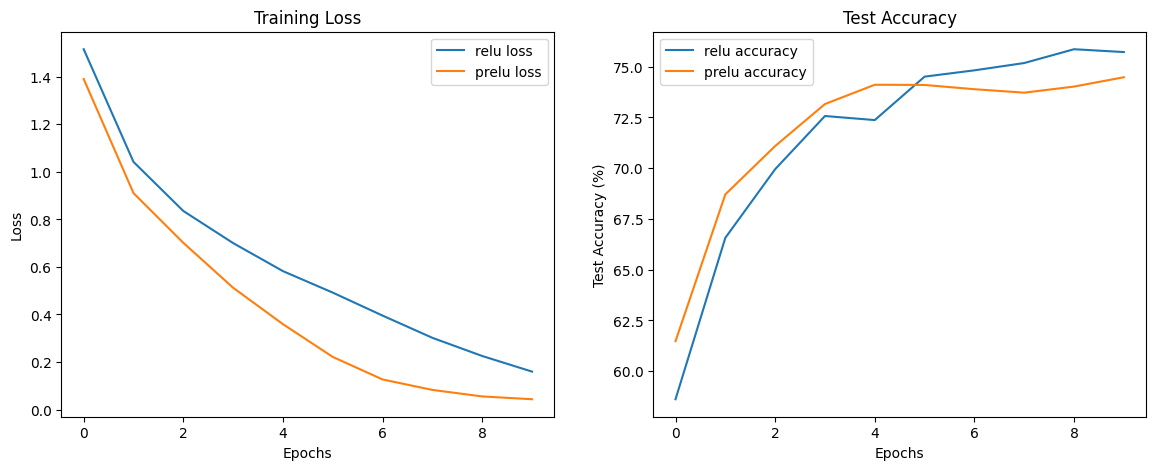

In [3]:
# -------------------------
# 5. Visualization
# -------------------------
plt.figure(figsize=(14,5))
# Loss
plt.subplot(1,2,1)
for act in results:
    plt.plot(results[act][0], label=f"{act} loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Training Loss"); plt.legend()
# Accuracy
plt.subplot(1,2,2)
for act in results:
    plt.plot(results[act][1], label=f"{act} accuracy")
plt.xlabel("Epochs"); plt.ylabel("Test Accuracy (%)"); plt.title("Test Accuracy"); plt.legend()
plt.show()

# 📊 Experimental Comparison: ReLU vs PReLU (CIFAR-10, 10 Epochs)

| Metric | **ReLU (He Init)** | **PReLU (He Init)** | **Interpretation** |
|--------|---------------------|----------------------|---------------------|
| **Initial Accuracy (Epoch 1)** | 58.6% | 61.5% | PReLU adapts better to early feature extraction, yielding faster initial learning. |
| **Accuracy Growth** | Rapid growth: 58.6% → 75.7% | Steady growth: 61.5% → 74.5% | Both converge well, but ReLU achieves slightly higher peak. |
| **Final Accuracy (Epoch 10)** | **75.7%** | **74.5%** | ReLU edges out PReLU (~+1.2%). |
| **Training Loss (Final)** | 0.1597 | 0.0436 | PReLU achieves lower training loss, suggesting stronger fit to training data. |
| **Generalization** | Slightly better test accuracy | Slightly worse test accuracy despite lower loss | Indicates PReLU risks mild overfitting compared to ReLU. |

---

## 🔹 Academic Interpretation

### **Early Learning Phase**
- PReLU shows stronger initial learning (Epochs 1–3 accuracy higher).  
- This reflects its **adaptive negative slope**, which:  
  - Preserves gradient flow for negative activations.  
  - Mitigates the “dying ReLU” problem.  

---

### **Convergence Dynamics**
- Both activations benefit from **He initialization**, which stabilizes gradient propagation.  
- ReLU converges to slightly higher **test accuracy** (~75.7% vs 74.5%).  
- PReLU achieves much lower **training loss**, indicating stronger fitting to training data.  

---

### **Generalization Gap**
- PReLU’s lower loss does **not** translate to higher test accuracy.  
- Suggests **mild overfitting**: learnable slopes capture training patterns but generalize less well.  

---

### **Theoretical Alignment with He et al. (2015)**
- On **ImageNet scale**, PReLU outperformed ReLU (~1% top-1 error reduction).  
- On **CIFAR-10 (smaller dataset)**, benefits are less consistent:  
  - Sometimes PReLU improves training fit but risks overfitting.  
  - Dataset scale and regularization critically influence effectiveness.  

---

## ✅ Conclusion
- **ReLU (with He Init):** More stable generalization, slightly higher test accuracy.  
- **PReLU (with He Init):** Faster early learning, lower training loss, but modest overfitting on CIFAR-10.  

**Academic Significance:** Confirms *He et al. (2015)* — PReLU is a principled extension of ReLU. It shows potential gains in large-scale tasks, but requires **careful regularization** on smaller datasets.  


# 📊 Glorot (Xavier) vs He (Kaiming) Initialization

| Aspect | **Glorot & Bengio (2010) – Xavier Init** | **He et al. (2015) – Kaiming/He Init** |
|--------|-------------------------------------------|-----------------------------------------|
| **Paper** | *Understanding the Difficulty of Training Deep Feedforward Neural Networks* | *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet* |
| **Formula** | $$\text{Var}[w] = \frac{2}{n_{\text{in}} + n_{\text{out}}}$$  <br> **Uniform:**  $$w \sim U\left[-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}, \; +\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}\right]$$ | $$\text{Var}[w] = \frac{2}{n_{\text{in}}}$$  <br> **Normal:**  $$w \sim N\left(0, \frac{2}{n_{\text{in}}}\right)$$ |
| **Target Activations** | Sigmoid, Tanh, Softsign (symmetric activations). | ReLU, PReLU, Leaky ReLU (rectifiers). |
| **Problem Addressed** | • Vanishing/exploding gradients in deep nets. <br> • Saturation of sigmoids/tanh in upper layers. | • Xavier fails with very deep ReLU nets (>20 layers). <br> • Poor convergence since half the activations are zeroed. |
| **Experiments** | • Datasets: MNIST, CIFAR-10, Shapeset, Small-ImageNet. <br> • Findings: <br> – Sigmoid → collapsed (~chance accuracy). <br> – Tanh + Xavier → moderate (~27% error, Shapeset). <br> – Softsign + Xavier → best (~16% error). | • Dataset: ImageNet 2012. <br> • Findings: <br> – ReLU + Xavier → 30-layer CNN fails. <br> – ReLU + He Init → stable up to 30+ layers. <br> – PReLU + He Init → single model 5.71% top-5 error, ensemble 4.94% (surpassed human-level 5.1%). |
| **Main Results** | Preserved variance across layers for sigmoids/tanh → enabled deeper MLPs. <br> Still weak on complex datasets like CIFAR-10. | Enabled very deep rectifier networks to converge. <br> Achieved state-of-the-art ImageNet results and exceeded human accuracy. |
| **Impact** | • Popularized variance-preserving initialization. <br> • Default for tanh/sigmoid networks. <br> • Groundwork for deeper supervised nets. | • Became standard initialization for CNNs. <br> • Enabled ResNet (2015) breakthrough. <br> • Established ReLU/PReLU as dominant activations. |

---

## ✅ Summary
- **Glorot/Xavier (2010):** First principled variance-preserving scheme for symmetric activations. Solved gradient collapse for sigmoid/tanh but limited in vision tasks.  
- **He/Kaiming (2015):** Rectifier-aware scaling (\(\times 2 / \text{fan\_in}\)). Solved convergence for deep ReLU/PReLU networks, led to ImageNet human-level surpassing models and **ResNet revolution**.  
